In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

df = pd.read_csv('network_traffic_multiclass_dataset.csv')

# Data overview
print("Dataset shape:", df.shape)


Dataset shape: (2073, 36)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_ip                  2073 non-null   object 
 1   dst_ip                  2073 non-null   object 
 2   src_port                2073 non-null   int64  
 3   dst_port                2073 non-null   int64  
 4   protocol                2073 non-null   object 
 5   duration                2073 non-null   float64
 6   total_packets           2073 non-null   int64  
 7   total_bytes             2073 non-null   int64  
 8   min_packet_size         2073 non-null   int64  
 9   max_packet_size         2073 non-null   int64  
 10  avg_packet_size         2073 non-null   float64
 11  std_packet_size         2073 non-null   float64
 12  syn_count               2073 non-null   int64  
 13  ack_count               2073 non-null   int64  
 14  fin_count               2073 non-null   

In [4]:
df.head()

,src_ip,dst_ip,src_port,dst_port,protocol,duration,total_packets,total_bytes,min_packet_size,max_packet_size,...,avg_iat,std_iat,min_iat,max_iat,syn_ack_ratio,is_port_22,is_port_6200,is_ftp_port,is_ftp_data_port,label
0,10.0.2.4,10.0.2.5,44017,22,TCP,2.103768,26,5451,66,1602,...,0.084151,0.385122,9.536743e-07,1.970212,0.080000,1,0,0,0,2
1,192.168.113.129,192.168.113.130,34105,21,TCP,9.837576,19,1331,54,100,...,0.546532,2.243282,0.000000e+00,9.795772,0.142857,0,0,1,0,1
2,10.0.2.4,10.0.2.5,40603,22,TCP,1.887265,26,5451,66,1602,...,0.075491,0.342151,3.004074e-05,1.750835,0.080000,1,0,0,0,2
3,192.168.113.129,192.168.113.130,35668,22,TCP,0.004840,13,3264,66,1602,...,0.000403,0.000673,4.196167e-05,0.002574,0.166667,1,0,0,0,0
4,192.168.113.129,192.168.113.130,41273,21,TCP,9.832887,19,1329,54,100,...,0.546272,2.242975,0.000000e+00,9.794246,0.142857,0,0,1,0,1


In [5]:
df.describe()

,src_port,dst_port,duration,total_packets,total_bytes,min_packet_size,max_packet_size,avg_packet_size,std_packet_size,syn_count,...,avg_iat,std_iat,min_iat,max_iat,syn_ack_ratio,is_port_22,is_port_6200,is_ftp_port,is_ftp_data_port,label
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.0,2073.000000
mean,42670.227689,1195.999518,130.542249,23.253739,3605.076218,64.653642,887.618427,152.864506,202.786377,2.052098,...,3.853059,18.473737,5.329064e-05,121.520897,0.188806,0.523396,0.190063,0.285576,0.0,0.951761
std,7100.515089,2424.628277,584.864891,12.687523,2672.903348,8.246425,748.875456,76.540131,185.653918,0.665030,...,34.757071,88.575626,5.637727e-04,543.555304,0.264945,0.499573,0.392445,0.451798,0.0,0.844348
min,68.000000,21.000000,0.000212,2.000000,134.000000,54.000000,74.000000,67.000000,0.000000,0.000000,...,0.000184,0.000000,0.000000e+00,0.000212,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,37293.000000,21.000000,0.006428,13.000000,1406.000000,66.000000,100.000000,73.894737,11.995151,2.000000,...,0.000330,0.000397,9.536743e-07,0.002152,0.080000,0.000000,0.000000,0.000000,0.0,0.000000
50%,41521.000000,22.000000,1.661962,26.000000,3264.000000,66.000000,1602.000000,209.653846,340.877707,2.000000,...,0.066387,0.301267,7.152557e-06,1.540935,0.080000,1.000000,0.000000,0.000000,0.0,1.000000
75%,46067.000000,22.000000,9.826100,29.000000,5451.000000,66.000000,1602.000000,209.653846,340.877707,2.000000,...,0.545874,1.402988,2.312660e-05,5.207952,0.166667,1.000000,0.000000,1.000000,0.0,2.000000
max,60980.000000,6200.000000,5756.946074,105.000000,21870.000000,342.000000,1602.000000,342.000000,441.261559,8.000000,...,1292.540743,1827.928142,2.430296e-02,5198.257350,1.000000,1.000000,1.000000,1.000000,0.0,2.000000


In [6]:
df.isnull().sum()

src_ip                    0
dst_ip                    0
src_port                  0
dst_port                  0
protocol                  0
duration                  0
total_packets             0
total_bytes               0
min_packet_size           0
max_packet_size           0
avg_packet_size           0
std_packet_size           0
syn_count                 0
ack_count                 0
fin_count                 0
rst_count                 0
psh_count                 0
urg_count                 0
packets_per_second        0
bytes_per_second          0
bytes_per_packet          0
forward_packets           0
backward_packets          0
forward_bytes             0
backward_bytes            0
forward_backward_ratio    0
avg_iat                   0
std_iat                   0
min_iat                   0
max_iat                   0
syn_ack_ratio             0
is_port_22                0
is_port_6200              0
is_ftp_port               0
is_ftp_data_port          0
label               

In [7]:
df.duplicated().sum()

np.int64(0)

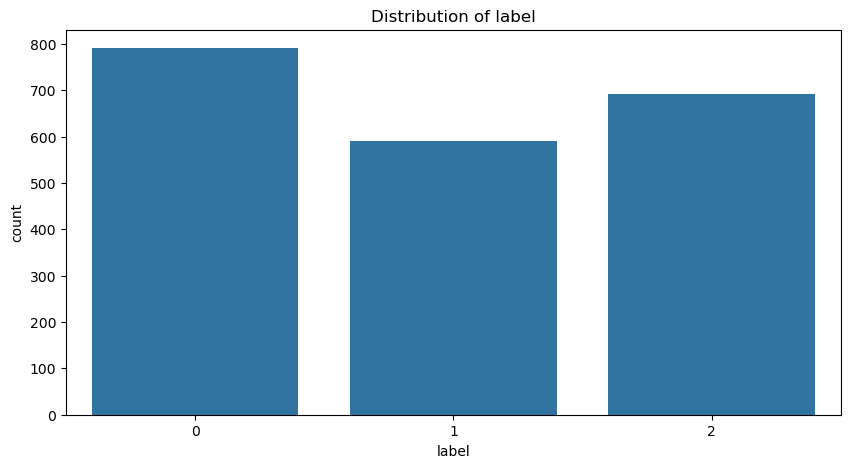

Before SMOTE:
label
0    791
2    691
1    591
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='label',data=df)
plt.title('Distribution of label')
plt.show()
print("Before SMOTE:")
print(df['label'].value_counts())

In [9]:

df.dtypes.value_counts()

int64      21
float64    12
object      3
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_ip                  2073 non-null   object 
 1   dst_ip                  2073 non-null   object 
 2   src_port                2073 non-null   int64  
 3   dst_port                2073 non-null   int64  
 4   protocol                2073 non-null   object 
 5   duration                2073 non-null   float64
 6   total_packets           2073 non-null   int64  
 7   total_bytes             2073 non-null   int64  
 8   min_packet_size         2073 non-null   int64  
 9   max_packet_size         2073 non-null   int64  
 10  avg_packet_size         2073 non-null   float64
 11  std_packet_size         2073 non-null   float64
 12  syn_count               2073 non-null   int64  
 13  ack_count               2073 non-null   int64  
 14  fin_count               2073 non-null   

In [11]:
df['src_ip'].value_counts()

src_ip
192.168.113.129    1380
10.0.2.4            691
192.168.113.130       2
Name: count, dtype: int64

In [12]:
import socket
import struct

def ip_to_int(ip):
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except:
        return 0  # or np.nan for invalid IPs

df['src_ip'] = df['src_ip'].apply(ip_to_int)
df['dst_ip'] = df['dst_ip'].apply(ip_to_int)

In [13]:
le_proto = LabelEncoder()
df['protocol'] = le_proto.fit_transform(df['protocol'])

In [14]:
from IPython.display import display
with pd.option_context('display.max_rows', 200):
    display(df.head(200))

,src_ip,dst_ip,src_port,dst_port,protocol,duration,total_packets,total_bytes,min_packet_size,max_packet_size,...,avg_iat,std_iat,min_iat,max_iat,syn_ack_ratio,is_port_22,is_port_6200,is_ftp_port,is_ftp_data_port,label
0,167772676,167772677,44017,22,0,2.103768,26,5451,66,1602,...,0.084151,0.385122,9.536743e-07,1.970212,0.080000,1,0,0,0,2
1,3232264577,3232264578,34105,21,0,9.837576,19,1331,54,100,...,0.546532,2.243282,0.000000e+00,9.795772,0.142857,0,0,1,0,1
2,167772676,167772677,40603,22,0,1.887265,26,5451,66,1602,...,0.075491,0.342151,3.004074e-05,1.750835,0.080000,1,0,0,0,2
3,3232264577,3232264578,35668,22,0,0.004840,13,3264,66,1602,...,0.000403,0.000673,4.196167e-05,0.002574,0.166667,1,0,0,0,0
4,3232264577,3232264578,41273,21,0,9.832887,19,1329,54,100,...,0.546272,2.242975,0.000000e+00,9.794246,0.142857,0,0,1,0,1
5,3232264577,3232264578,38303,6200,0,9.827375,19,1408,66,93,...,0.545965,1.404089,1.597404e-05,5.208955,0.111111,0,1,0,0,1
6,3232264577,3232264578,47206,22,0,0.004967,13,3264,66,1602,...,0.000414,0.000651,1.096725e-05,0.002500,0.166667,1,0,0,0,0
7,3232264577,3232264578,34772,22,0,0.005232,13,3264,66,1602,...,0.000436,0.000638,3.814697e-06,0.002456,0.166667,1,0,0,0,0
8,167772676,167772677,37401,22,0,2.251479,26,5451,66,1602,...,0.090059,0.418483,1.192093e-05,2.139537,0.080000,1,0,0,0,2
9,167772676,167772677,45419,22,0,2.402515,26,5451,66,1602,...,0.096101,0.448425,9.536743e-07,2.292310,0.080000,1,0,0,0,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_ip                  2073 non-null   int64  
 1   dst_ip                  2073 non-null   int64  
 2   src_port                2073 non-null   int64  
 3   dst_port                2073 non-null   int64  
 4   protocol                2073 non-null   int64  
 5   duration                2073 non-null   float64
 6   total_packets           2073 non-null   int64  
 7   total_bytes             2073 non-null   int64  
 8   min_packet_size         2073 non-null   int64  
 9   max_packet_size         2073 non-null   int64  
 10  avg_packet_size         2073 non-null   float64
 11  std_packet_size         2073 non-null   float64
 12  syn_count               2073 non-null   int64  
 13  ack_count               2073 non-null   int64  
 14  fin_count               2073 non-null   

In [16]:
correlation = df.corr()
correlation

,src_ip,dst_ip,src_port,dst_port,protocol,duration,total_packets,total_bytes,min_packet_size,max_packet_size,...,avg_iat,std_iat,min_iat,max_iat,syn_ack_ratio,is_port_22,is_port_6200,is_ftp_port,is_ftp_data_port,label
src_ip,1.000000,1.000000,0.296327,0.342462,0.021974,-0.248238,-0.438599,-0.773937,-0.115474,-0.674700,...,-0.050803,-0.208464,0.055668,-0.264025,0.290170,-0.674759,0.342537,0.447063,NaN,-0.878070
dst_ip,1.000000,1.000000,0.296327,0.342462,0.021974,-0.248238,-0.438599,-0.773937,-0.115474,-0.674700,...,-0.050803,-0.208464,0.055668,-0.264025,0.290170,-0.674759,0.342537,0.447063,NaN,-0.878070
src_port,0.296327,0.296327,1.000000,-0.193941,-0.186344,-0.147393,0.065136,-0.106648,-0.088933,-0.070094,...,-0.095979,-0.107863,-0.006807,-0.102334,-0.119278,-0.075046,-0.193708,0.264051,NaN,-0.471353
dst_port,0.342462,0.342462,-0.193941,1.000000,-0.014019,-0.074709,-0.480815,-0.512364,-0.096289,-0.520664,...,0.035039,-0.035457,0.154303,-0.074807,0.666751,-0.507533,0.999999,-0.306465,NaN,0.027770
protocol,0.021974,0.021974,-0.186344,-0.014019,1.000000,0.295358,-0.015321,0.018309,0.885213,-0.023809,...,0.315484,0.127440,-0.000539,0.039318,-0.022151,-0.032566,-0.015054,-0.019648,NaN,0.001776
duration,-0.248238,-0.248238,-0.147393,-0.074709,0.295358,1.000000,0.480018,0.563456,0.283504,0.153199,...,0.531117,0.913161,-0.015582,0.961240,-0.072827,0.150890,-0.075041,-0.121963,NaN,0.237790
total_packets,-0.438599,-0.438599,0.065136,-0.480815,-0.015321,0.480018,1.000000,0.742711,0.138686,0.127362,...,0.101635,0.389319,-0.133503,0.489664,-0.623265,0.116096,-0.480766,0.290289,NaN,0.225411
total_bytes,-0.773937,-0.773937,-0.106648,-0.512364,0.018309,0.563456,0.742711,1.000000,0.208380,0.694841,...,0.139306,0.457432,-0.097453,0.567582,-0.458835,0.690175,-0.512462,-0.319276,NaN,0.531310
min_packet_size,-0.115474,-0.115474,-0.088933,-0.096289,0.885213,0.283504,0.138686,0.208380,1.000000,0.182184,...,0.271143,0.123777,-0.037572,0.058611,-0.209373,0.171134,-0.097164,-0.165675,NaN,-0.009332
max_packet_size,-0.674700,-0.674700,-0.070094,-0.520664,-0.023809,0.153199,0.127362,0.694841,0.182184,1.000000,...,0.008372,0.119750,-0.071467,0.165835,-0.321355,0.999799,-0.520782,-0.651519,NaN,0.393402


In [17]:
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df.to_string(index=False))

    print("\nOptions for handling missing values:")
    print("1. Fill with mean (for numerical)")
    print("2. Fill with median (for numerical)")
    print("3. Drop rows with missing values")
    print("4. Drop columns with missing values")
    choice = input("Enter your choice (1-4): ")

    if choice == '1':
        df = df.fillna(df.mean())
        print("✓ Missing values filled with mean")
    elif choice == '2':
        df = df.fillna(df.median())
        print("✓ Missing values filled with median")
    elif choice == '3':
        df = df.dropna()
        print(f"✓ Rows with missing values dropped. New shape: {df.shape}")
    elif choice == '4':
        df = df.dropna(axis=1)
        print(f"✓ Columns with missing values dropped. New shape: {df.shape}")
else:
    print("✓ No missing values found!")

✓ No missing values found!


In [18]:
X = df.drop('label', axis=1)
y = df['label']

In [19]:
inf_check = np.isinf(X)
inf_cols = X.columns[inf_check.any()].tolist()

if len(inf_cols) > 0:
    print(f"Found infinite values in {len(inf_cols)} columns:")
    for col in inf_cols:
        inf_count = np.isinf(X[col]).sum()
        print(f"  - {col}: {inf_count} infinite values")

    print("\nOptions:")
    print("1. Replace with column mean")
    print("2. Replace with column median")
    print("3. Replace with a large number (999999)")
    print("4. Drop rows with infinite values")
    choice = input("Enter your choice (1-4): ")

    if choice == '1':
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.fillna(X.mean())
        print("✓ Infinite values replaced with mean")
    elif choice == '2':
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.fillna(X.median())
        print("✓ Infinite values replaced with median")
    elif choice == '3':
        X = X.replace([np.inf, -np.inf], 999999)
        print("✓ Infinite values replaced with 999999")
    elif choice == '4':
        mask = ~inf_check.any(axis=1)
        X = X[mask]
        y = y[mask]
        print(f"✓ Rows with infinite values dropped. New shape: {X.shape}")
else:
    print("✓ No infinite values found!")


✓ No infinite values found!


In [20]:
variances = X.var()
zero_var_features = variances[variances == 0].index.tolist()

print(f"Found {len(zero_var_features)} zero variance features:")
if len(zero_var_features) > 0:
    for feat in zero_var_features:
        print(f"  - {feat}")

    print("\nZero variance features have the same value for all samples.")
    print("They provide no information for the model.")

    choice = input("\nRemove zero variance features? (y/n): ")
    if choice.lower() == 'y':
        X = X.drop(columns=zero_var_features)
        print(f"✓ Removed {len(zero_var_features)} features. New shape: {X.shape}")
    else:
        print("✓ Keeping all features")
else:
    print("✓ No zero variance features found!")

Found 2 zero variance features:
  - urg_count
  - is_ftp_data_port

Zero variance features have the same value for all samples.
They provide no information for the model.
✓ Removed 2 features. New shape: (2073, 33)



Top 20 features correlated with target:
  src_ip                         : 0.8781
  dst_ip                         : 0.8781
  bytes_per_second               : 0.7611
  packets_per_second             : 0.5616
  backward_bytes                 : 0.5342
  total_bytes                    : 0.5313
  forward_bytes                  : 0.5173
  src_port                       : 0.4714
  is_ftp_port                    : 0.4661
  is_port_22                     : 0.3997
  max_packet_size                : 0.3934
  forward_packets                : 0.2983
  max_iat                        : 0.2466
  duration                       : 0.2378
  std_packet_size                : 0.2365
  avg_packet_size                : 0.2276
  bytes_per_packet               : 0.2276
  syn_count                      : 0.2262
  total_packets                  : 0.2254
  ack_count                      : 0.2180

Bottom 10 features (weakest correlation with target):
  forward_backward_ratio         : 0.1527
  avg_iat             

✓ Removed 7 weak features. New shape: (2073, 26)

Creating correlation with target visualization...
✓ Saved visualization: target_correlation.png

✓ STEP 8 COMPLETE: Target correlation analyzed

Press Enter to continue to Step 9...


''

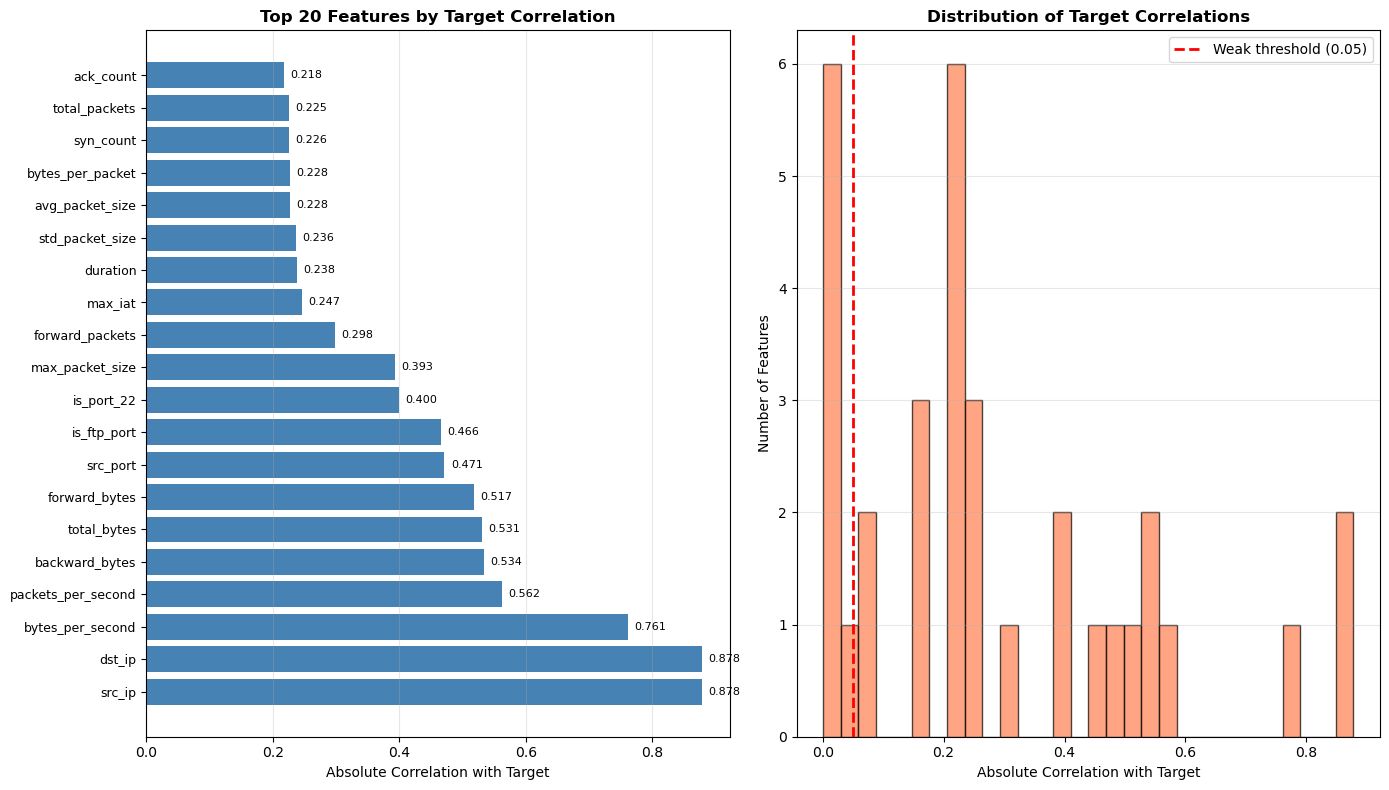

In [21]:
# Calculate correlation with target
target_correlations = X.corrwith(y).abs().sort_values(ascending=False)

print(f"\nTop 20 features correlated with target:")
print("="*60)
for feat, corr in target_correlations.head(20).items():
    print(f"  {feat:30s} : {corr:.4f}")

print(f"\nBottom 10 features (weakest correlation with target):")
print("="*60)
for feat, corr in target_correlations.tail(10).items():
    print(f"  {feat:30s} : {corr:.4f}")

# Identify weak features
weak_threshold = 0.05
weak_features = target_correlations[target_correlations < weak_threshold].index.tolist()

print(f"\nFeatures with correlation < {weak_threshold}: {len(weak_features)}")
if len(weak_features) > 0:
    print("These features have very weak relationship with the target:")
    for feat in weak_features[:15]:
        print(f"  - {feat}: {target_correlations[feat]:.4f}")
    if len(weak_features) > 15:
        print(f"  ... and {len(weak_features)-15} more")

    print("\nWeak features may not be useful for prediction.")
    choice = input("\nRemove features with correlation < 0.05? (y/n): ")

    if choice.lower() == 'y':
        X = X.drop(columns=weak_features)
        print(f"✓ Removed {len(weak_features)} weak features. New shape: {X.shape}")
    else:
        print("✓ Keeping all features")
else:
    print("✓ All features have reasonable correlation with target!")

# Visualize correlation with target
print("\nCreating correlation with target visualization...")
plt.figure(figsize=(14, 8))

# Top features
plt.subplot(1, 2, 1)
top_20 = target_correlations.head(20)
plt.barh(range(len(top_20)), top_20.values, color='steelblue')
plt.yticks(range(len(top_20)), top_20.index, fontsize=9)
plt.xlabel('Absolute Correlation with Target')
plt.title('Top 20 Features by Target Correlation', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_20.values):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=8)

# Distribution
plt.subplot(1, 2, 2)
plt.hist(target_correlations, bins=30, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(weak_threshold, color='red', linestyle='--', linewidth=2, label=f'Weak threshold ({weak_threshold})')
plt.xlabel('Absolute Correlation with Target')
plt.ylabel('Number of Features')
plt.title('Distribution of Target Correlations', fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('/mnt/user-data/outputs/target_correlation.png', dpi=150, bbox_inches='tight')
print("✓ Saved visualization: target_correlation.png")

print("\n✓ STEP 8 COMPLETE: Target correlation analyzed")
print("\nPress Enter to continue to Step 9...")
input()



STEP 9: FEATURE-TO-FEATURE CORRELATION
Computing correlation matrix... (this may take a moment)

Found 23 pairs with correlation > 0.95:
  src_ip <-> dst_ip: 1.000
  duration <-> max_iat: 0.961
  total_packets <-> ack_count: 0.995
  total_packets <-> forward_packets: 0.991
  total_packets <-> backward_packets: 0.993
  total_bytes <-> forward_bytes: 0.990
  total_bytes <-> backward_bytes: 0.989
  max_packet_size <-> avg_packet_size: 0.979
  max_packet_size <-> std_packet_size: 0.983
  max_packet_size <-> bytes_per_packet: 0.979
  ... and 13 more pairs

Highly correlated features may be redundant.

Removing 12 features (keeping ones with higher target correlation):
  - std_packet_size
  - bytes_per_packet
  - max_packet_size
  - psh_count
  - backward_packets
  - dst_ip
  - ack_count
  - total_bytes
  - total_packets
  - forward_bytes
  ... and 2 more
✓ Removed 12 correlated features. New shape: (2073, 14)

Creating correlation heatmap (first 20 features)...
✓ Saved visualization: corre

''

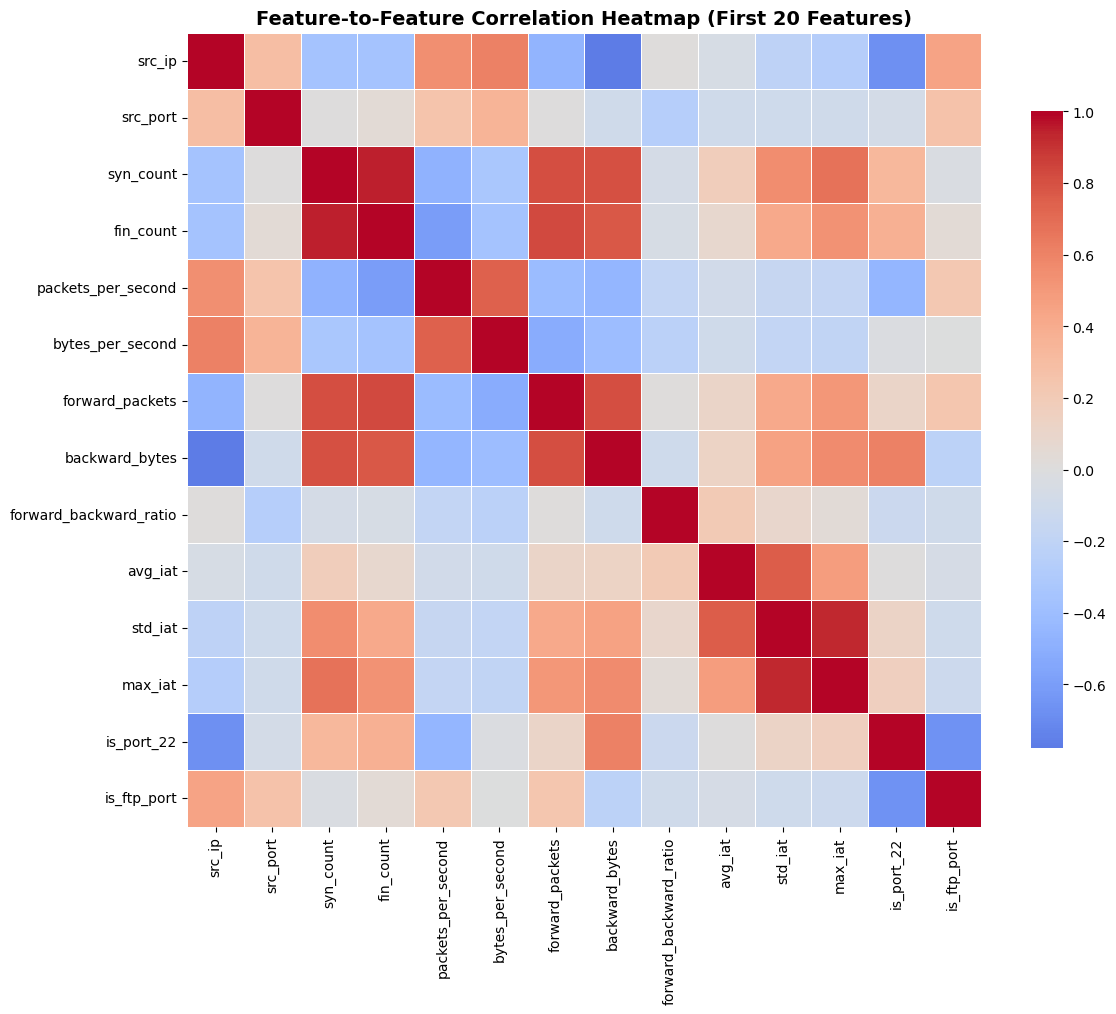

In [22]:
print("\n" + "="*70)
print("STEP 9: FEATURE-TO-FEATURE CORRELATION")
print("="*70)

print("Computing correlation matrix... (this may take a moment)")
corr_matrix = X.corr()

# Find highly correlated features
threshold = 0.95
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

print(f"\nFound {len(high_corr_pairs)} pairs with correlation > {threshold}:")
if len(high_corr_pairs) > 0:
    for pair in high_corr_pairs[:10]:  # Show first 10
        print(f"  {pair['Feature1']} <-> {pair['Feature2']}: {pair['Correlation']:.3f}")

    if len(high_corr_pairs) > 10:
        print(f"  ... and {len(high_corr_pairs)-10} more pairs")

    print("\nHighly correlated features may be redundant.")
    choice = input("\nRemove highly correlated features? (y/n): ")

    if choice.lower() == 'y':
        # Remove one feature from each highly correlated pair
        # Keep the one with higher correlation to target
        to_remove = set()
        for pair in high_corr_pairs:
            feat1 = pair['Feature1']
            feat2 = pair['Feature2']
            # Compare correlation with target
            if target_correlations[feat1] < target_correlations[feat2]:
                to_remove.add(feat1)
            else:
                to_remove.add(feat2)

        to_remove = list(to_remove)
        print(f"\nRemoving {len(to_remove)} features (keeping ones with higher target correlation):")
        for feat in to_remove[:10]:
            print(f"  - {feat}")
        if len(to_remove) > 10:
            print(f"  ... and {len(to_remove)-10} more")

        X = X.drop(columns=to_remove)
        # Update target correlations
        target_correlations = X.corrwith(y).abs().sort_values(ascending=False)
        print(f"✓ Removed {len(to_remove)} correlated features. New shape: {X.shape}")
    else:
        print("✓ Keeping all features")
else:
    print("✓ No highly correlated features found!")

# Visualize correlation heatmap (sample)
print("\nCreating correlation heatmap (first 20 features)...")
plt.figure(figsize=(12, 10))
sample_corr = X.iloc[:, :20].corr()
sns.heatmap(sample_corr, cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature-to-Feature Correlation Heatmap (First 20 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
# plt.savefig('/mnt/user-data/outputs/correlation_heatmap.png', dpi=150, bbox_inches='tight')
print("✓ Saved visualization: correlation_heatmap.png")

print("\n✓ STEP 9 COMPLETE: Feature-to-feature correlation analyzed")
print("\nPress Enter to continue to Step 10...")
input()

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_ip                  2073 non-null   int64  
 1   src_port                2073 non-null   int64  
 2   syn_count               2073 non-null   int64  
 3   fin_count               2073 non-null   int64  
 4   packets_per_second      2073 non-null   float64
 5   bytes_per_second        2073 non-null   float64
 6   forward_packets         2073 non-null   int64  
 7   backward_bytes          2073 non-null   int64  
 8   forward_backward_ratio  2073 non-null   float64
 9   avg_iat                 2073 non-null   float64
 10  std_iat                 2073 non-null   float64
 11  max_iat                 2073 non-null   float64
 12  is_port_22              2073 non-null   int64  
 13  is_ftp_port             2073 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 22

In [24]:
correlations = X.corrwith(y).sort_values(ascending=False)

print("Feature correlations with target (including target itself):")
print("========================================================")
print(correlations)

Feature correlations with target (including target itself):
backward_bytes            0.534214
is_port_22                0.399704
forward_packets           0.298267
max_iat                   0.246645
syn_count                 0.226230
std_iat                   0.208875
fin_count                 0.168334
forward_backward_ratio    0.152726
avg_iat                   0.077677
is_ftp_port              -0.466138
src_port                 -0.471353
packets_per_second       -0.561597
bytes_per_second         -0.761148
src_ip                   -0.878070
dtype: float64


In [25]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)


In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 1. Most simple: compare counts before and after
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
label
0    632
2    553
1    473
Name: count, dtype: int64

After SMOTE:
label
2    632
0    632
1    632
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_smote)
X_train_scaled = scaler.transform(X_train_smote)
X_test_scaled  = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

print("\n===== Logistic Regression =====")
log_model = LogisticRegression()
log_model.fit(X_train_smote, y_train_smote)

y_train_pred_lr = log_model.predict(X_train_smote)
y_test_pred_lr = log_model.predict(X_test)

print("\n===== Logistic Regression =====")
print("Train Accuracy:", accuracy_score(y_train_smote, y_train_pred_lr))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Precision:", precision_score(y_test, y_test_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_lr))
print("\n")


===== Logistic Regression =====

===== Logistic Regression =====
Train Accuracy: 0.8813291139240507
Test Accuracy: 0.8746987951807229
Precision: 0.8778823929942691
Recall: 0.8746987951807229
F1 Score: 0.8752733895734742
Confusion Matrix:
 [[127  32   0]
 [ 20  98   0]
 [  0   0 138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       159
           1       0.75      0.83      0.79       118
           2       1.00      1.00      1.00       138

    accuracy                           0.87       415
   macro avg       0.87      0.88      0.87       415
weighted avg       0.88      0.87      0.88       415





c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# ======================
# 6. Random Forest Classifier
# ======================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("===== Random Forest =====")

# Initialize and train the model
rand_model = RandomForestClassifier(
    n_estimators=3,
    random_state=42
)
rand_model.fit(X_train_smote, y_train_smote)

# Predictions
y_train_pred_rf = rand_model.predict(X_train_smote)
y_test_pred_rf = rand_model.predict(X_test)

# Train/Test Accuracy
print("Train Accuracy:", accuracy_score(y_train_smote, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

# Precision, Recall, F1
print("Precision:", precision_score(y_test, y_test_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred_rf, average='weighted'))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))


===== Random Forest =====
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Confusion Matrix:
 [[159   0   0]
 [  0 118   0]
 [  0   0 138]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       138

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 3. Train SVM
svm_model = svm.SVC(kernel='rbf', C=4, gamma='scale')
svm_model.fit(X_train_smote, y_train_smote)

# 4. Evaluate
y_train_pred_svm = svm_model.predict(X_train_smote)
y_test_pred_svm = svm_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train_smote, y_train_pred_svm))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Precision:", precision_score(y_test, y_test_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred_svm, average='weighted'))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_svm))
print("\n")

Train Accuracy: 0.75
Test Accuracy: 0.7228915662650602
Precision: 0.7482773198055379
Recall: 0.7228915662650602
F1 Score: 0.7205903197565348


Confusion Matrix:
 [[ 75  84   0]
 [ 31  87   0]
 [  0   0 138]]


